In [8]:
#Se importan las librerías
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties
from matplotlib import pylab
from scipy.optimize import curve_fit
import sympy.printing as printing
import random

In [9]:
#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

Buen día, usuario.
Este programa se encarga de simular el programa "Let's make a deal", en el cual hay un número s de puertas, detrás de las cuales hay g cabras y c autos (estando cada uno detrás de cada puerta). Después de su elección aleatoria, se le abrirán p puertas en las cuales usted verá hay cabras, y tendrá la libertad de elegir si mantenerse en esa opción, o si cambiar a alguna de las otras s-p-1 puertas.
Se le dará la opción de repetir esta simulación N veces, de tal forma que se acumulará la frecuencia con la que se gana y con la que se pierde. Tome en cuente que mientras más grande sea N, la frecuencia relativa más tenderá a la probabilidad.


¿Cuántas veces va a realizar el experimento? 
  100000
¿Cuántas cabras quiere en el experimeto? 
  2
¿Cuántos autos desea en el experimento? 
  1


El programa ha iniciado. Usted tiene 2 cabras y 1 autos, en un total de 3 puertas. 

Usted acaba de elegir aleatoriamente una puerta. 



¿Cuántas cabras el presentador va a revelar de las puertas restantes? 
 1
Monty Hall abre esas puertas que escogió. 
Detrás de esas puertas había cabras. 
Desea cambiar su primera elección a alguna otra de las puertas restantes? [s/n] 
 s


Frecuencia relativa de los autos: 0.66687
Frecuencia relativa de las cabras: 0.33313


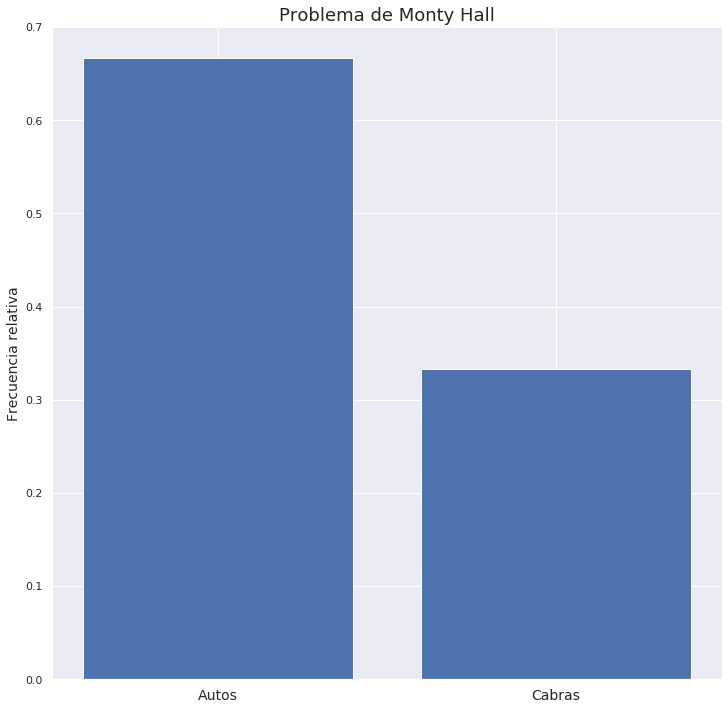

<Figure size 864x864 with 0 Axes>

In [16]:
#Presentándose al usuario y aclarando de qué va el programa
print('Buen día, usuario.') 
print('Este programa se encarga de simular el programa'
      ' "Let\'s make a deal", en el cual hay un número s de puertas, detrás'
     ' de las cuales hay g cabras y c autos (estando cada uno detrás de cada'
      ' puerta). Después de su elección aleatoria, se le abrirán p puertas en'
      ' las cuales usted verá hay cabras, y tendrá la libertad de elegir si'
      ' mantenerse en esa opción, o si cambiar a alguna de las otras s-p-1'
     ' puertas.')
print('Se le dará la opción de repetir esta simulación N veces, de tal forma que' 
      ' se acumulará la frecuencia con la que se gana y con la que se pierde.' 
      ' Tome en cuente que mientras más grande sea N, la frecuencia relativa más'
      ' tenderá a la probabilidad.')

#Obteniendo los parámetros
N = int(input('¿Cuántas veces va a realizar el experimento? \n '))

g = int(input('¿Cuántas cabras quiere en el experimeto? \n '))

c = int(input('¿Cuántos autos desea en el experimento? \n '))

#Consiguiendo la cantidad total de puertas
s = g + c


#Información
print('El programa ha iniciado. Usted tiene', g , 'cabras y' , c , 'autos, en un total de' , s , 'puertas. \n')

print('Usted acaba de elegir aleatoriamente una puerta. \n')


#Consiguiendo el último parámetro
p = int(input('¿Cuántas cabras el presentador va a revelar de las puertas restantes? \n'))

#Las puertas restantes
q = s-p-1

#El programa se divide en dos casos: en donde no cambia de puerta, y en donde sí
case = str(input('Monty Hall abre esas puertas que escogió. \n'
            'Detrás de esas puertas había cabras. \n'
            'Desea cambiar su primera elección a alguna otra de las puertas restantes? [s/n] \n'))



#Se declara el arreglo de 0s y 1s; siendo 0s las cabras y 1s los autos (como las puertas del programa)
A = []

#Se llena el arreglo de las g cabras
for t in range (g):

    A.append(0)

#Se llena el arreglo de los c autos
for t in range (c):

    A.append(1)
    
    
#Las frecuencias (contadores) inician en 0
w = l = 0



#Si el usuario no cambia de opción
if case == "n":
    
    #Se repite el experimento N veces
    for t in range (N):
        
        #Se genera un número aleatorio en el rango de elementos del arreglo, es decir, la elección
        #aleatoria del usuario al elegir la primera puerta
        i = np.random.randint (0,s)

        #Si es un auto, suma 1
        if A[i]==1:
    
            w +=1
    
        #Si es una cabra, suma 1
        elif A[i]==0:
    
            l +=1
        #Puesto que el usuario no cambió de opción, en nada más afectó la revelación de las puertas
        #y su descarte
        
#Si el usuario sí cambia de opción
elif case == "s":
    
    #Se repite el experimento N veces
    for t in range(N):
            
            
        #Se genera un número aleatorio en el rango de elementos del arreglo, es decir, la elección
        #aleatoria del usuario al elegir la primera puerta
        i = np.random.randint (0,s)
        
        
        #Sí le atinó a un auto primero
        if A[i]==1:
            
            #Ese elemento es quitado del arreglo (puesto que va a cambiar de elección)
            A.remove(1)
            
        
            #Se quitan del arreglo las p cabras que Monty Hall mostró
            for x in range(p):
                
                A.remove(0)
                
                
            #Se consigue el tamaño del nuevo arreglo
            x = len(A)
            
            #Se escoge aleatoriamente la segunda puerta de las restantes
            j = np.random.randint (0,x)
        
        
            #Si es un auto, suma 1
            if A[j] == 1:
            
                
                w += 1
                
                #Y reiniciar para el siguiente experimento
                A.clear()
        
                A = []

                for t in range (c):

                    A.append(1)
    
                for t in range (g):

                    A.append(0)
            
            
            #Si es una cabra, suma 1
            elif A[j] == 0:
            
                
                l += 1 
                
                #Y reiniciar para el siguiente experimento
                A.clear()
        
                A = []
            

                for t in range (c):

                    A.append(1)
    
                for t in range (g):

                    A.append(0)
            
        #Si le atinó a una cabra primero
        elif A[i]==0:
            
            #Ese elemento es quitado del arreglo (puesto que va a cambiar de elección)
            A.remove(0)
            
            
            #Se quitan del arreglo las p cabras que Monty Hall mostró
            for x in range(p):
            
            
                A.remove(0)
                
                
            #Se consigue el tamaño del nuevo arreglo 
            x = len(A)
        
            #Se escoge aleatoriamente la segunda puerta de las restantes
            j = np.random.randint (0,x)
        
            
            #Si es un auto, suma 1
            if A[j] == 1:
            
                
                w+=1
                
                #Y reiniciar para el siguiente experimento
                A.clear()
        
                A = []


                for t in range (c):

                    A.append(1)
    
                for t in range (g):
        
                    A.append(0)
            
            
            #Si es una cabra, suma 1
            elif A[j] == 0:
            
                
                l += 1 
                
                #Y reiniciar para el siguiente experimento
                A.clear()
        
                A = []


                for t in range (c):

                    A.append(1)
    
                for t in range (g):
        
                    A.append(0)
            

#Calculando las frecuencias
f_c = l/N
f_a = w/N


#Se muestran los resultados
    
print("Frecuencia relativa de los autos:" ,f_a)

print("Frecuencia relativa de las cabras:" ,f_c)

#Se grafican

fig = plt.figure(u'PROBABILIDADES') # Figure
ax = fig.add_subplot(111) # Axes

eje_x = ('Autos','Cabras')
datos = [f_a, f_c]
xx = np.arange(len(eje_x))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(eje_x, fontsize = 14)
ax.set_ylabel('Frecuencia relativa', fontsize = 14)
ax.set_title('Problema de Monty Hall', fontsize = 18)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('FrecuenciasMontyHall.png', dpi=300)